Imports

In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import os
import random as r

from IPython.display import display
from PIL import Image
from torchvision.transforms import transforms

from application.src.utils.presentation import convert_upload, print_result, get_relevant_scores, show
from application.src.models.faster_rcnn import load_model

Load model and create a Tensor transformer

In [3]:
model = load_model()
transform = transforms.Compose([transforms.ToTensor()])

# Demonstration image with signs

In [19]:
uploader = widgets.FileUpload(accept='.jpg', multiple=False)
display(uploader)

FileUpload(value={}, accept='.jpg', description='Upload')

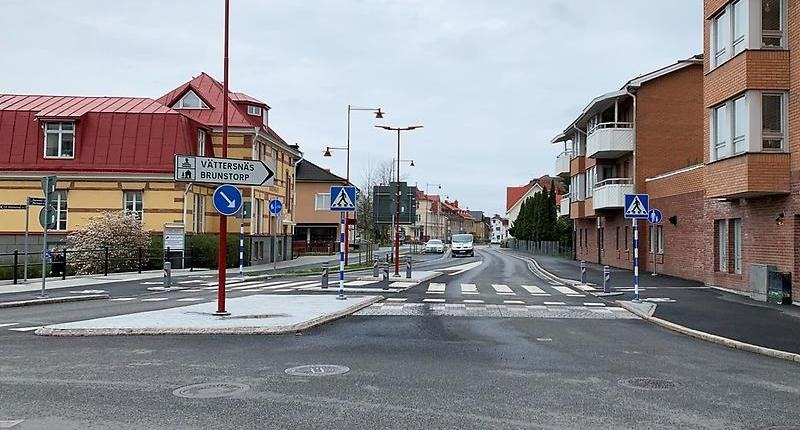

In [9]:
image = convert_upload(uploader.value)
uploader.close()

image

Predict and get the relevant scores

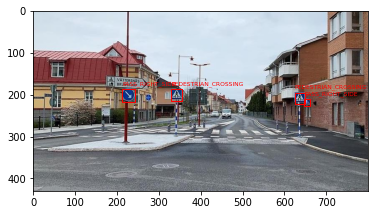

Sign: PEDESTRIAN_CROSSING - Accuracy: 99%
Sign: PEDESTRIAN_CROSSING - Accuracy: 99%
Sign: PASS_RIGHT_SIDE - Accuracy: 99%
Sign: PASS_RIGHT_SIDE - Accuracy: 83%


In [10]:
prediction_image = transform(image)
prediction_image = prediction_image.view(1, 3, prediction_image.shape[1], prediction_image.shape[2])

labels, scores, boxes = model.predict(prediction_image)
labels, scores, boxes = get_relevant_scores(labels, scores, boxes)

show(image, labels, boxes)
print_result(labels, scores)

Predict and get all scores

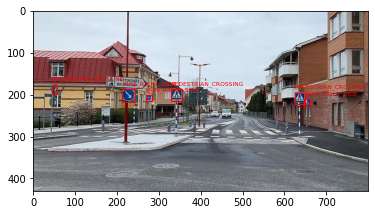

Sign: PEDESTRIAN_CROSSING - Accuracy: 99%
Sign: PEDESTRIAN_CROSSING - Accuracy: 99%
Sign: PASS_RIGHT_SIDE - Accuracy: 99%
Sign: PASS_RIGHT_SIDE - Accuracy: 83%
Sign: PASS_RIGHT_SIDE - Accuracy: 24%
Sign: PEDESTRIAN_CROSSING - Accuracy: 8%


In [12]:
labels, scores, boxes = model.predict(prediction_image)

show(image, labels, boxes)
print_result(labels, scores)

#### Demonstrate image with no signs

In [13]:
uploader = widgets.FileUpload(accept='.jpg', multiple=False)
display(uploader)

FileUpload(value={}, accept='.jpg', description='Upload')

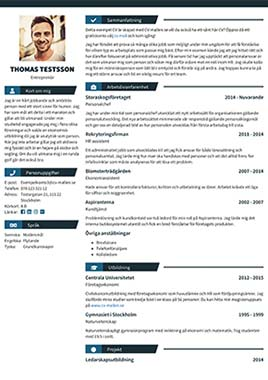

In [14]:
image = convert_upload(uploader.value)
uploader.close()

image

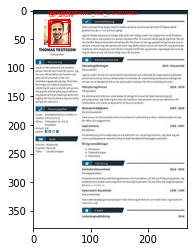

Sign: 80_SIGN - Accuracy: 10%
Sign: WARNING - Accuracy: 5%
Sign: NO_STOPPING_NO_STANDING - Accuracy: 5%


In [15]:
prediction_image = transform(image)
prediction_image = prediction_image.view(1, 3, prediction_image.shape[1], prediction_image.shape[2])

labels, scores, boxes = model.predict(prediction_image)

show(image, labels, boxes)
print_result(labels, scores)

#### Datasets

Create paths and load images for plotting

In [16]:
from application.src.config import TRAIN_DIR, WIKI_DIR

paths = [WIKI_DIR + '/' + r.choice(os.listdir(WIKI_DIR)) for _ in range(9)]
wikipedia_images = [Image.open(image) for image in paths]
paths.clear()

for _ in range(9):
    filename = r.choice(os.listdir(TRAIN_DIR))

    if filename[-3:] == 'jpg':
        path = '%s/%s' % (TRAIN_DIR, filename)
    else:
        filename = filename[:-3] + 'jpg'
        path = '%s/%s' % (TRAIN_DIR, filename)

    paths.append(path)

lu_images = [Image.open(image) for image in paths]

Wikipedia dataset

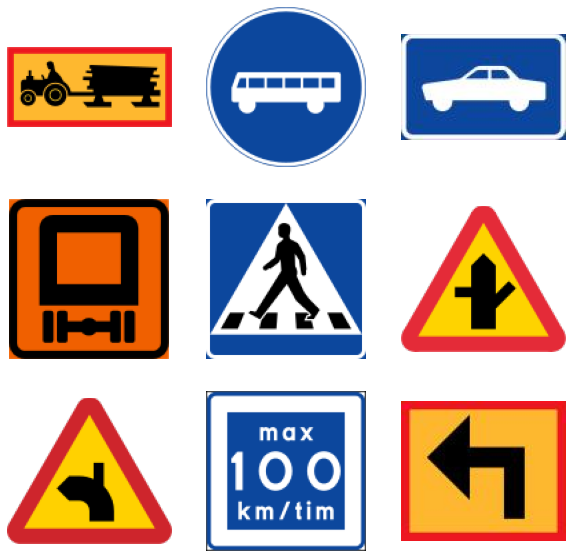

In [17]:
fig = plt.figure(figsize=(10, 10))
rows, cols = 3, 3

for i in range(9):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(wikipedia_images[i])
    plt.axis('off')

Linköpings Universitet dataset

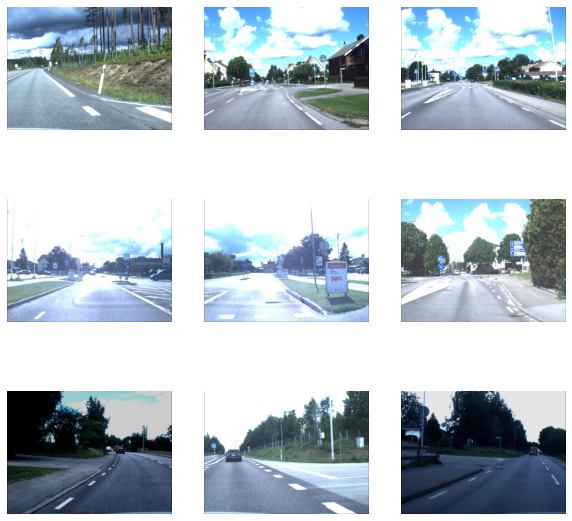

In [18]:
fig = plt.figure(figsize=(10, 10))
rows, cols = 3, 3

for i in range(9):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(lu_images[i])
    plt.axis('off')